# Lab 2: Classification Using KNN and RNN Algorithms  
**Name:** Vishnu Mallam  
**Subject:** Advanced Big Data and Data Mining  
**Lab Assignment:** Lab 2 - Classification Using KNN and RNN Algorithms  


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Prepare the Dataset


Step 1: Loading and Exploring the Wine Dataset
--------------------------------------------------
Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensi

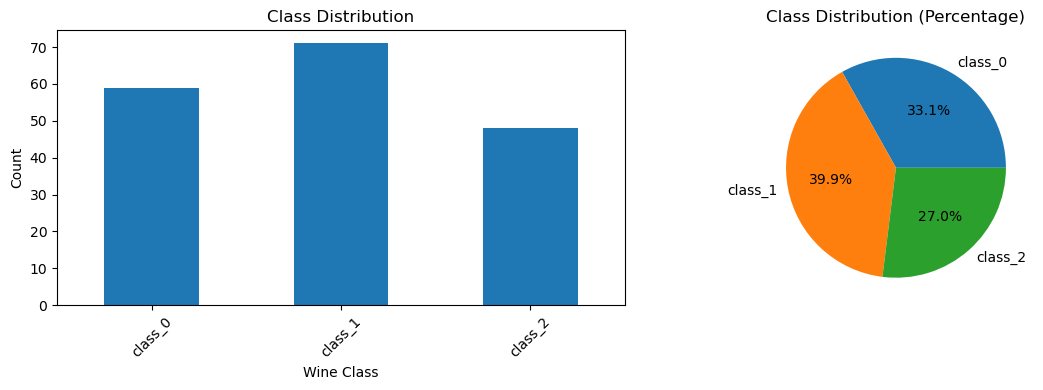


Training set size: 142 samples
Testing set size: 36 samples


In [7]:
# Step 1: Load and Prepare the Dataset
print("\nStep 1: Loading and Exploring the Wine Dataset")
print("-" * 50)

# Load the Wine dataset
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# Create DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y

print(f"Dataset shape: {wine_df.shape}")
print(f"Number of features: {len(wine_data.feature_names)}")
print(f"Number of classes: {len(wine_data.target_names)}")
print(f"Class names: {wine_data.target_names}")

# Display basic information about the dataset
print("\nDataset Info:")
print(wine_df.info())

print("\nClass distribution:")
print(wine_df['target'].value_counts().sort_index())

print("\nFirst few rows of the dataset:")
print(wine_df.head())

print("\nBasic statistics:")
print(wine_df.describe())

# Visualize class distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
wine_df['target'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], wine_data.target_names, rotation=45)

plt.subplot(1, 2, 2)
plt.pie(wine_df['target'].value_counts().sort_index(), 
        labels=wine_data.target_names, autopct='%1.1f%%')
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Feature scaling (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


## Step 2: Implement K-Nearest Neighbors (KNN)


In [10]:

# Step 2: Implement K-Nearest Neighbors (KNN)
print("\n\nStep 2: K-Nearest Neighbors (KNN) Classification")
print("-" * 60)

# Define k values to test
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []
knn_results = {}

print("Testing different k values for KNN:")
print("k\tAccuracy\tTraining Accuracy")
print("-" * 40)

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    
    # Calculate accuracies
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    knn_accuracies.append(test_accuracy)
    knn_results[k] = {
        'test_accuracy': test_accuracy,
        'train_accuracy': train_accuracy,
        'predictions': y_pred
    }
    
    print(f"{k}\t{test_accuracy:.4f}\t\t{train_accuracy:.4f}")

# Find best k value
best_k = k_values[np.argmax(knn_accuracies)]
print(f"\nBest k value: {best_k} with accuracy: {max(knn_accuracies):.4f}")



Step 2: K-Nearest Neighbors (KNN) Classification
------------------------------------------------------------
Testing different k values for KNN:
k	Accuracy	Training Accuracy
----------------------------------------
1	0.9722		1.0000
5	0.9722		0.9789
11	1.0000		0.9648
15	1.0000		0.9718
21	1.0000		0.9718

Best k value: 11 with accuracy: 1.0000


## Step 3: Implement Radius Neighbors (RNN)

In [12]:
# Step 3: Implement Radius Neighbors (RNN)
print("\n\nStep 3: Radius Neighbors (RNN) Classification")
print("-" * 60)

# Define radius values to test
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []
rnn_results = {}

print("Testing different radius values for RNN:")
print("Radius\tAccuracy\tTraining Accuracy\tOutliers (Test)")
print("-" * 55)

for radius in radius_values:
    # Create and train RNN classifier
    rnn = RadiusNeighborsClassifier(radius=radius)
    rnn.fit(X_train, y_train)
    
    try:
        # Make predictions
        y_pred = rnn.predict(X_test)
        y_train_pred = rnn.predict(X_train)
        
        # Calculate accuracies
        test_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Count outliers (samples with no neighbors within radius)
        outliers = np.sum([len(neighbors) == 0 for neighbors in rnn.radius_neighbors(X_test, return_distance=False)])
        
        rnn_accuracies.append(test_accuracy)
        rnn_results[radius] = {
            'test_accuracy': test_accuracy,
            'train_accuracy': train_accuracy,
            'outliers': outliers,
            'predictions': y_pred
        }
        
        print(f"{radius}\t{test_accuracy:.4f}\t\t{train_accuracy:.4f}\t\t{outliers}")
        
    except Exception as e:
        print(f"{radius}\tFailed - {str(e)[:30]}...")
        rnn_accuracies.append(0)
        rnn_results[radius] = {
            'test_accuracy': 0,
            'train_accuracy': 0,
            'outliers': 'N/A',
            'error': str(e)
        }

# Find best radius value
if max(rnn_accuracies) > 0:
    best_radius = radius_values[np.argmax(rnn_accuracies)]
    print(f"\nBest radius value: {best_radius} with accuracy: {max(rnn_accuracies):.4f}")
else:
    print("\nNo successful RNN classifications - consider different radius values")



Step 3: Radius Neighbors (RNN) Classification
------------------------------------------------------------
Testing different radius values for RNN:
Radius	Accuracy	Training Accuracy	Outliers (Test)
-------------------------------------------------------
350	0.3889		0.4014		0
400	0.3889		0.4014		0
450	0.3889		0.4014		0
500	0.3889		0.4014		0
550	0.3889		0.4014		0
600	0.3889		0.4014		0

Best radius value: 350 with accuracy: 0.3889


## Step 4: Visualize and Compare Results



Step 4: Visualization and Comparison
--------------------------------------------------


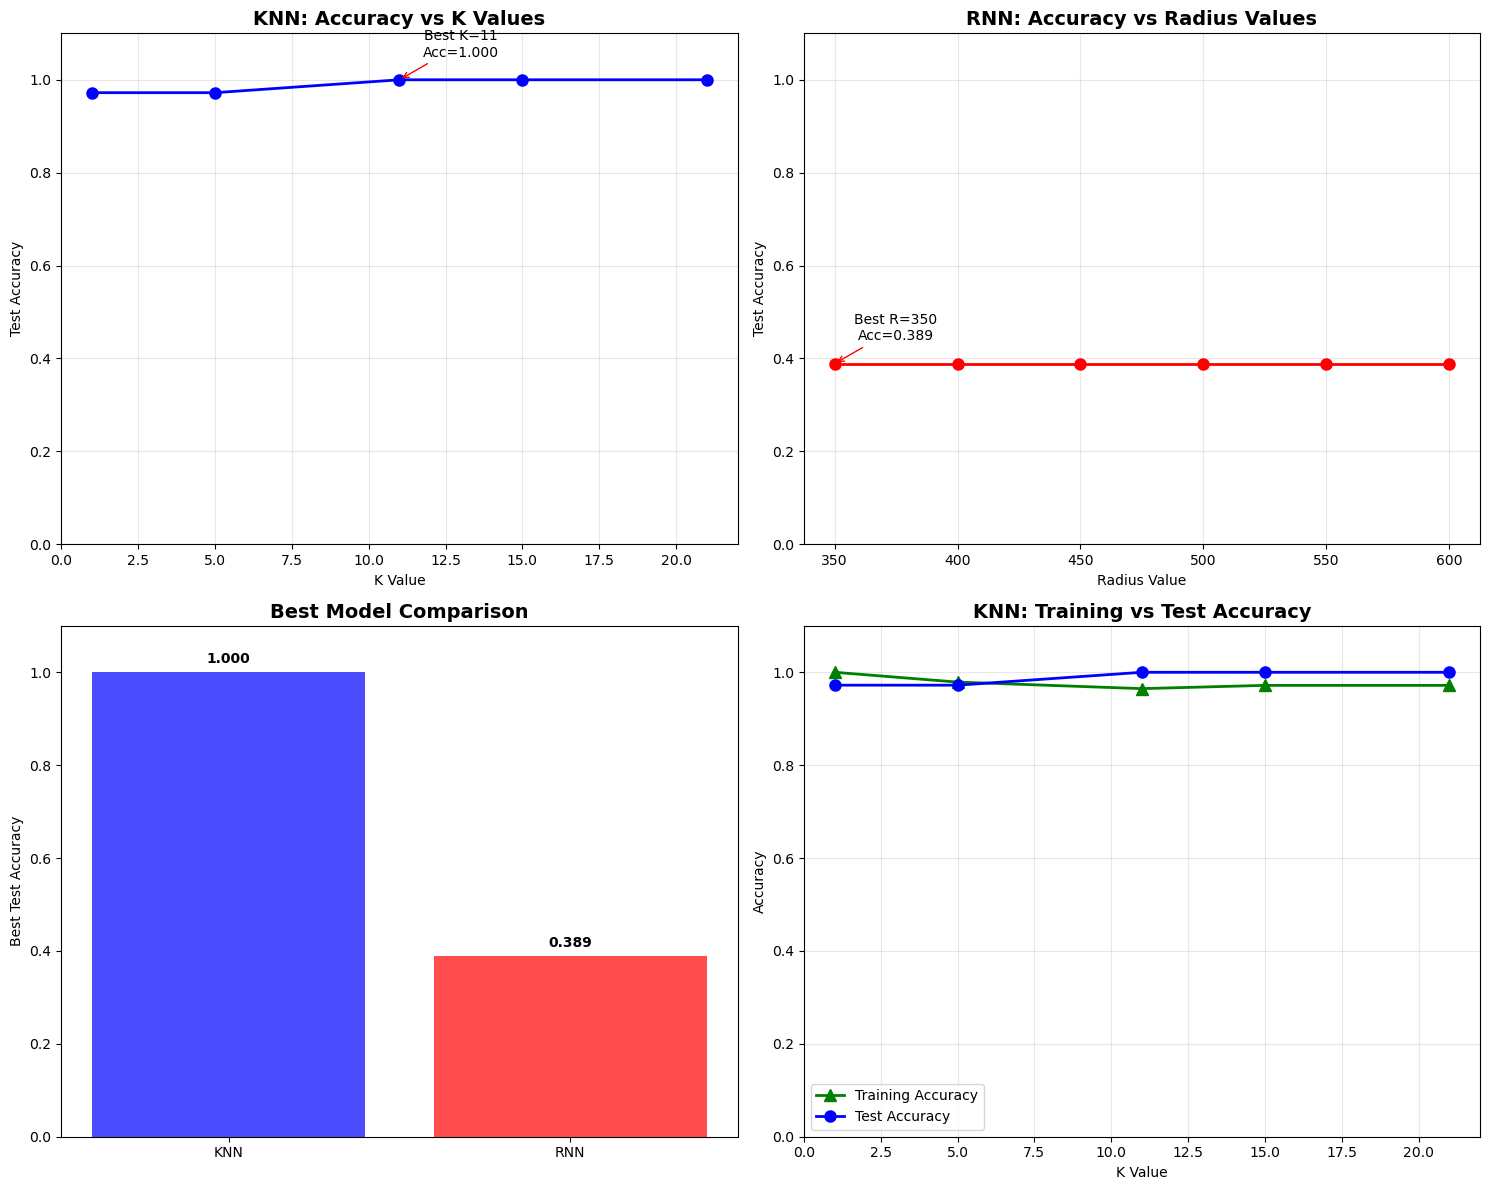


DETAILED RESULTS SUMMARY

KNN Results:
------------------------------
K= 1: Test Acc=0.9722, Train Acc=1.0000
K= 5: Test Acc=0.9722, Train Acc=0.9789
K=11: Test Acc=1.0000, Train Acc=0.9648
K=15: Test Acc=1.0000, Train Acc=0.9718
K=21: Test Acc=1.0000, Train Acc=0.9718

Best KNN Configuration: K=11, Accuracy=1.0000

RNN Results:
------------------------------
R=350: Test Acc=0.3889, Train Acc=0.4014, Outliers=0
R=400: Test Acc=0.3889, Train Acc=0.4014, Outliers=0
R=450: Test Acc=0.3889, Train Acc=0.4014, Outliers=0
R=500: Test Acc=0.3889, Train Acc=0.4014, Outliers=0
R=550: Test Acc=0.3889, Train Acc=0.4014, Outliers=0
R=600: Test Acc=0.3889, Train Acc=0.4014, Outliers=0

Best RNN Configuration: Radius=350, Accuracy=0.3889


In [14]:
# Step 4: Visualize and Compare Results
print("\n\nStep 4: Visualization and Comparison")
print("-" * 50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: KNN Accuracy vs K values
axes[0, 0].plot(k_values, knn_accuracies, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('KNN: Accuracy vs K Values', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('K Value')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, 1.1)

# Annotate best k
best_k_idx = np.argmax(knn_accuracies)
axes[0, 0].annotate(f'Best K={best_k}\nAcc={max(knn_accuracies):.3f}', 
                   xy=(best_k, max(knn_accuracies)), 
                   xytext=(best_k+2, max(knn_accuracies)+0.05),
                   arrowprops=dict(arrowstyle='->', color='red'),
                   fontsize=10, ha='center')

# Plot 2: RNN Accuracy vs Radius values
valid_rnn_accuracies = [acc for acc in rnn_accuracies if acc > 0]
valid_radius_values = [radius_values[i] for i, acc in enumerate(rnn_accuracies) if acc > 0]

if valid_rnn_accuracies:
    axes[0, 1].plot(valid_radius_values, valid_rnn_accuracies, 'ro-', linewidth=2, markersize=8)
    axes[0, 1].set_title('RNN: Accuracy vs Radius Values', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Radius Value')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1.1)
    
    # Annotate best radius
    if max(valid_rnn_accuracies) > 0:
        best_radius_idx = np.argmax(valid_rnn_accuracies)
        best_radius_acc = max(valid_rnn_accuracies)
        best_radius_val = valid_radius_values[best_radius_idx]
        axes[0, 1].annotate(f'Best R={best_radius_val}\nAcc={best_radius_acc:.3f}', 
                           xy=(best_radius_val, best_radius_acc), 
                           xytext=(best_radius_val+25, best_radius_acc+0.05),
                           arrowprops=dict(arrowstyle='->', color='red'),
                           fontsize=10, ha='center')
else:
    axes[0, 1].text(0.5, 0.5, 'No valid RNN results\nConsider different radius values', 
                   ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12)
    axes[0, 1].set_title('RNN: No Valid Results', fontsize=14, fontweight='bold')

# Plot 3: Comparison of best models
best_models = ['KNN', 'RNN']
best_accuracies = [max(knn_accuracies), max(rnn_accuracies) if rnn_accuracies else 0]

axes[1, 0].bar(best_models, best_accuracies, color=['blue', 'red'], alpha=0.7)
axes[1, 0].set_title('Best Model Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Best Test Accuracy')
axes[1, 0].set_ylim(0, 1.1)

# Add value labels on bars
for i, v in enumerate(best_accuracies):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 4: Training vs Test Accuracy for KNN
train_accs = [knn_results[k]['train_accuracy'] for k in k_values]
test_accs = knn_accuracies

axes[1, 1].plot(k_values, train_accs, 'g^-', label='Training Accuracy', linewidth=2, markersize=8)
axes[1, 1].plot(k_values, test_accs, 'bo-', label='Test Accuracy', linewidth=2, markersize=8)
axes[1, 1].set_title('KNN: Training vs Test Accuracy', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('K Value')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Detailed Results Summary
print("\n" + "="*70)
print("DETAILED RESULTS SUMMARY")
print("="*70)

print("\nKNN Results:")
print("-" * 30)
for k in k_values:
    result = knn_results[k]
    print(f"K={k:2d}: Test Acc={result['test_accuracy']:.4f}, Train Acc={result['train_accuracy']:.4f}")

print(f"\nBest KNN Configuration: K={best_k}, Accuracy={max(knn_accuracies):.4f}")

print("\nRNN Results:")
print("-" * 30)
for radius in radius_values:
    result = rnn_results[radius]
    if 'error' not in result:
        print(f"R={radius}: Test Acc={result['test_accuracy']:.4f}, Train Acc={result['train_accuracy']:.4f}, Outliers={result['outliers']}")
    else:
        print(f"R={radius}: Failed - {result['error'][:50]}...")

if max(rnn_accuracies) > 0:
    print(f"\nBest RNN Configuration: Radius={best_radius}, Accuracy={max(rnn_accuracies):.4f}")


In [15]:
# Analysis and Observations
print("\n" + "="*70)
print("ANALYSIS AND OBSERVATIONS")
print("="*70)

print("\n1. KNN Performance Analysis:")
print(f"   • Best performing K value: {best_k}")
print(f"   • Accuracy range: {min(knn_accuracies):.3f} - {max(knn_accuracies):.3f}")
print(f"   • The model shows {'overfitting' if train_accs[0] > test_accs[0] + 0.05 else 'good generalization'} characteristics")

if any(acc > 0 for acc in rnn_accuracies):
    print(f"\n2. RNN Performance Analysis:")
    print(f"   • Best performing radius: {best_radius}")
    print(f"   • RNN is sensitive to radius selection")
    print(f"   • Large radius values may include too many neighbors")
    print(f"   • Small radius values may result in no neighbors (outliers)")
else:
    print(f"\n2. RNN Performance Analysis:")
    print(f"   • RNN failed with tested radius values")
    print(f"   • Consider smaller radius values or different distance metrics")
    print(f"   • Dataset may not be suitable for radius-based classification")

print(f"\n3. Model Comparison:")
if max(knn_accuracies) > max(rnn_accuracies):
    print(f"   • KNN outperforms RNN with {max(knn_accuracies):.3f} vs {max(rnn_accuracies):.3f} accuracy")
    print(f"   • KNN is more robust for this dataset")
else:
    print(f"   • RNN outperforms KNN with {max(rnn_accuracies):.3f} vs {max(knn_accuracies):.3f} accuracy")

print(f"\n4. When to use each algorithm:")
print(f"   • KNN: When you want consistent performance and have a reasonable dataset size")
print(f"   • RNN: When you want to identify outliers or have varying density regions")
print(f"   • For this Wine dataset, KNN appears more suitable due to uniform feature distribution")

# Classification Report for Best Models
print("\n" + "="*70)
print("CLASSIFICATION REPORTS")
print("="*70)

print(f"\nClassification Report - Best KNN (K={best_k}):")
print("-" * 50)
best_knn_pred = knn_results[best_k]['predictions']
print(classification_report(y_test, best_knn_pred, target_names=wine_data.target_names))

if max(rnn_accuracies) > 0:
    print(f"\nClassification Report - Best RNN (Radius={best_radius}):")
    print("-" * 50)
    best_rnn_pred = rnn_results[best_radius]['predictions']
    print(classification_report(y_test, best_rnn_pred, target_names=wine_data.target_names))



ANALYSIS AND OBSERVATIONS

1. KNN Performance Analysis:
   • Best performing K value: 11
   • Accuracy range: 0.972 - 1.000
   • The model shows good generalization characteristics

2. RNN Performance Analysis:
   • Best performing radius: 350
   • RNN is sensitive to radius selection
   • Large radius values may include too many neighbors
   • Small radius values may result in no neighbors (outliers)

3. Model Comparison:
   • KNN outperforms RNN with 1.000 vs 0.389 accuracy
   • KNN is more robust for this dataset

4. When to use each algorithm:
   • KNN: When you want consistent performance and have a reasonable dataset size
   • RNN: When you want to identify outliers or have varying density regions
   • For this Wine dataset, KNN appears more suitable due to uniform feature distribution

CLASSIFICATION REPORTS

Classification Report - Best KNN (K=11):
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       1.00 